In [1]:
#%matplotlib notebook

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import fitsio
from fitsio import FITS,FITSHDR
from astropy import units as u
from astropy.coordinates import SkyCoord
from PIL import Image
from scipy import stats
import matplotlib.lines as mlines
import matplotlib.colors as clr


In [2]:
#upload SDSS spectroscopic data
data = '/Users/amyel/research/SMASH_project/datafiles/ssppOut-dr10.fits'
fx = fitsio.FITS(data)
objs_SDSS = fx[1].read()
#cut out declinations with values less than -90
good=(objs_SDSS["DEC"]>=-90)
objs_SDSS=objs_SDSS[good]
#creat SkyCoord object
cSDSS = SkyCoord(objs_SDSS["RA"],objs_SDSS["DEC"],unit="deg")

In [3]:
#print total number of objects in data set
print('SDSS objects',(len(objs_SDSS)))

SDSS objects 1843193


In [4]:
#upload LAMOST data
data = '/Users/amyel/research/SMASH_project/datafiles/dr3_stellar.fits'
fx = fitsio.FITS(data)
objs_LAMOST = fx[1].read()
cLAMOST = SkyCoord(objs_LAMOST["ra"],objs_LAMOST["dec"],unit="deg")

In [5]:
#print total number of objects in data set
print('LAMOST objects',(len(objs_LAMOST)))

LAMOST objects 3177995


In [6]:
#cross matching SDSS to LAMOST
idSDSS,d2d,d3d = cLAMOST.match_to_catalog_sky(cSDSS)
good=(d2d.arcsec < 1)

In [7]:
#matched SMASH with SDSS
objs_LAMOST = objs_LAMOST[good]
objs_SDSS = objs_SDSS[idSDSS][good]
feh_lamost = objs_LAMOST['feh']
feh_sdss = objs_SDSS['FEH_ADOP']

In [8]:
select = np.where((feh_sdss >= -5) & (feh_sdss <= 5) & (feh_lamost >= -5) & (feh_lamost <= 5))

In [9]:
feh_lamost = feh_lamost[select]
feh_sdss = feh_sdss[select]

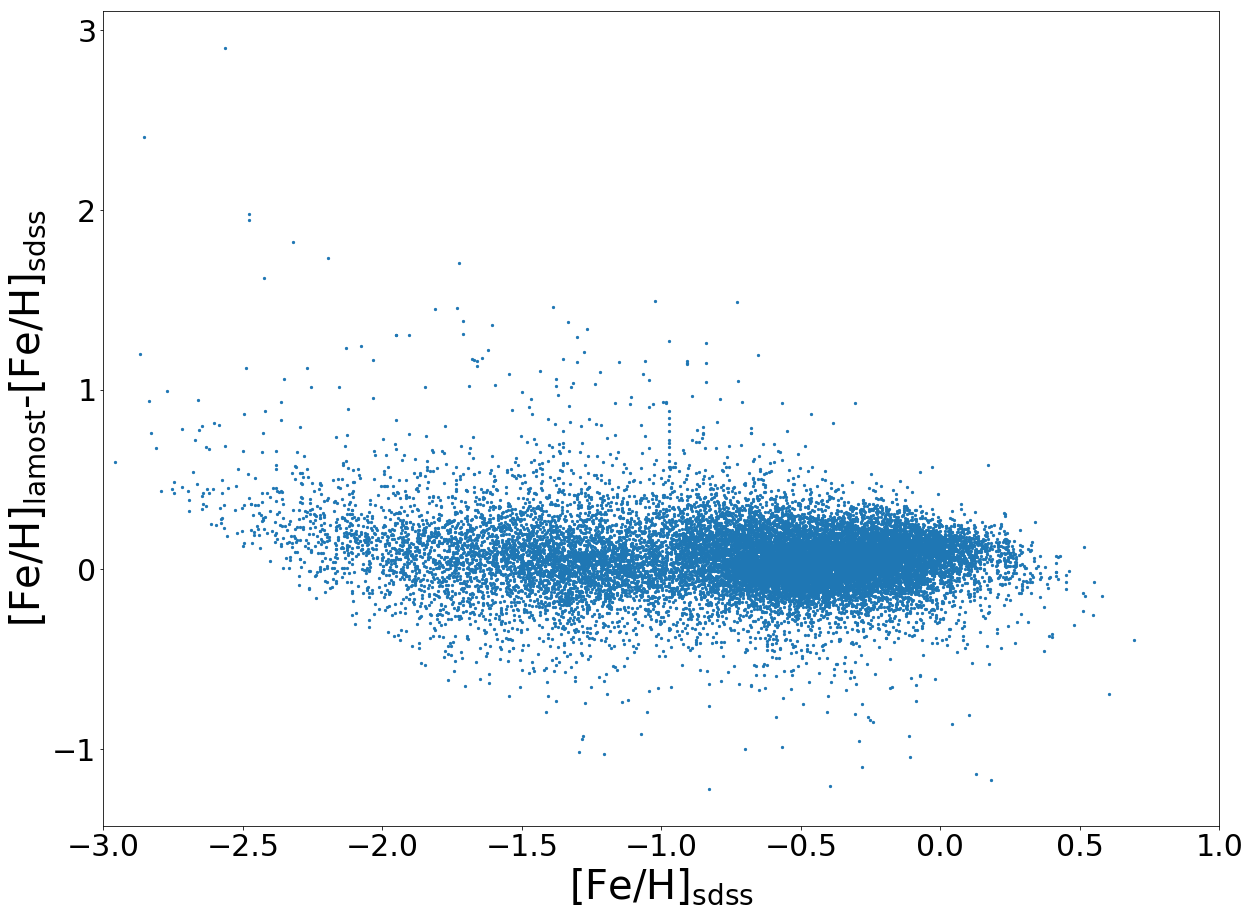

In [15]:
#x axis: [Fe/H]_spec
#y axis: delta [Fe/H]: my values - spectroscopic value: straight line
#the shape tells us about how our my method is doing

delta = feh_lamost-feh_sdss

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(feh_sdss,delta,s=5)
plt.xlabel('[Fe/H]$_\mathregular{sdss}$',fontsize=40)
plt.ylabel('[Fe/H]$_\mathregular{lamost}$-[Fe/H]$_\mathregular{sdss}$',fontsize=40)
        
ax.set_xlim(-3,1)

ax.tick_params(axis='both', which='major', labelsize=30)


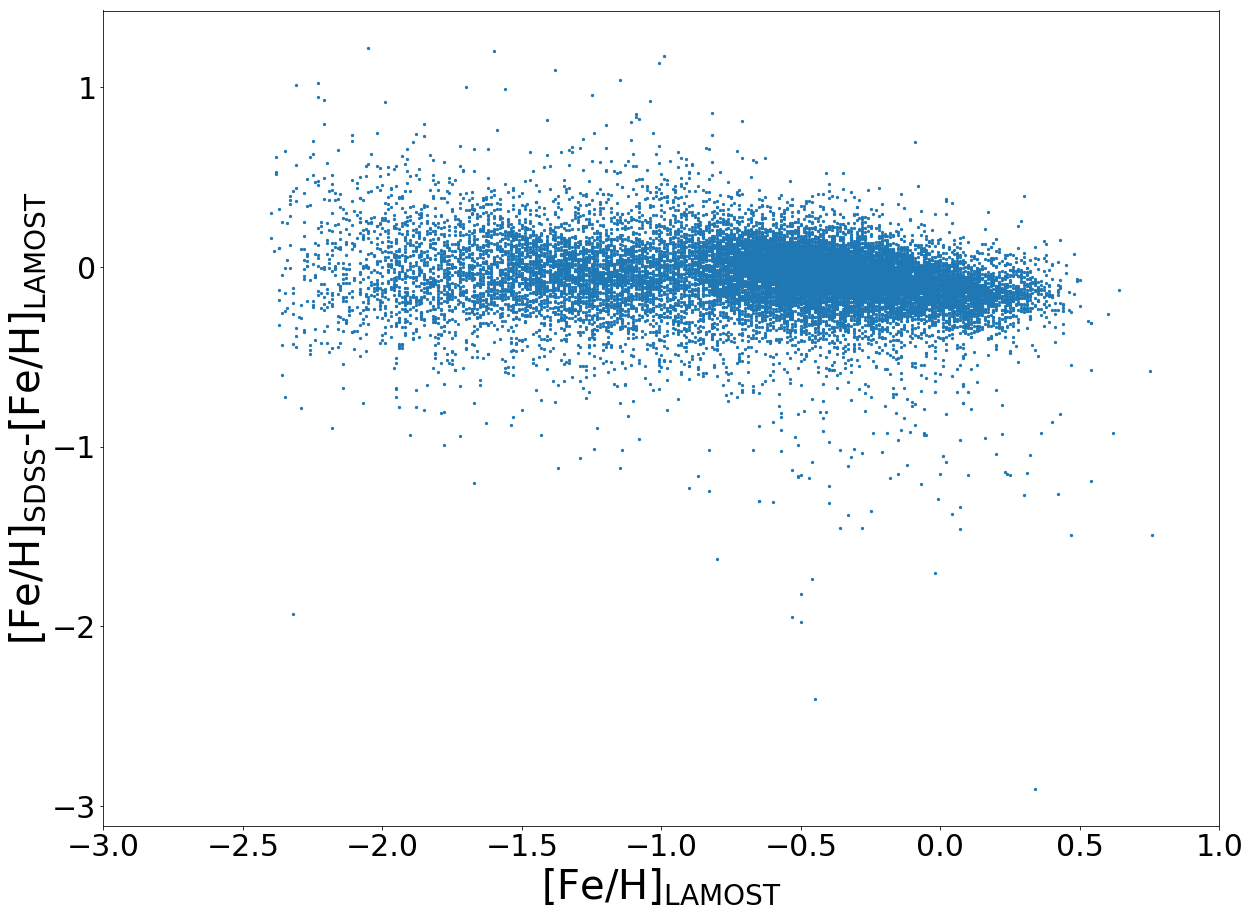

In [14]:
#x axis: [Fe/H]_spec
#y axis: delta [Fe/H]: my values - spectroscopic value: straight line
#the shape tells us about how our my method is doing

delta = feh_sdss-feh_lamost

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(feh_lamost,delta,s=5)
plt.xlabel('[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
plt.ylabel('[Fe/H]$_\mathregular{SDSS}$-[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
        
ax.set_xlim(-3,1)

ax.tick_params(axis='both', which='major', labelsize=30)


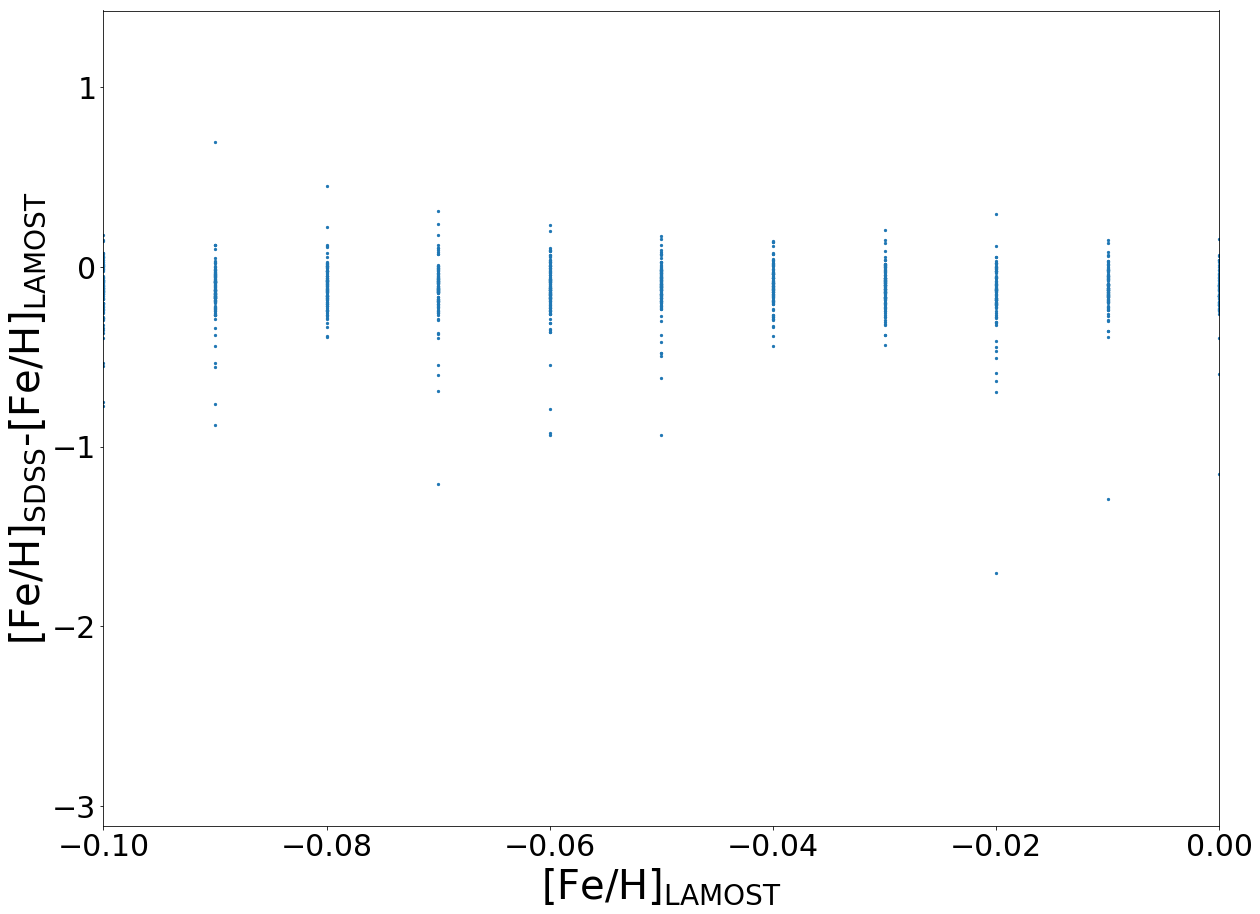

In [18]:
#x axis: [Fe/H]_spec
#y axis: delta [Fe/H]: my values - spectroscopic value: straight line
#the shape tells us about how our my method is doing

delta = feh_sdss-feh_lamost

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(feh_lamost,delta,s=5)
plt.xlabel('[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
plt.ylabel('[Fe/H]$_\mathregular{SDSS}$-[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
        
ax.set_xlim(-.1,0)

ax.tick_params(axis='both', which='major', labelsize=30)


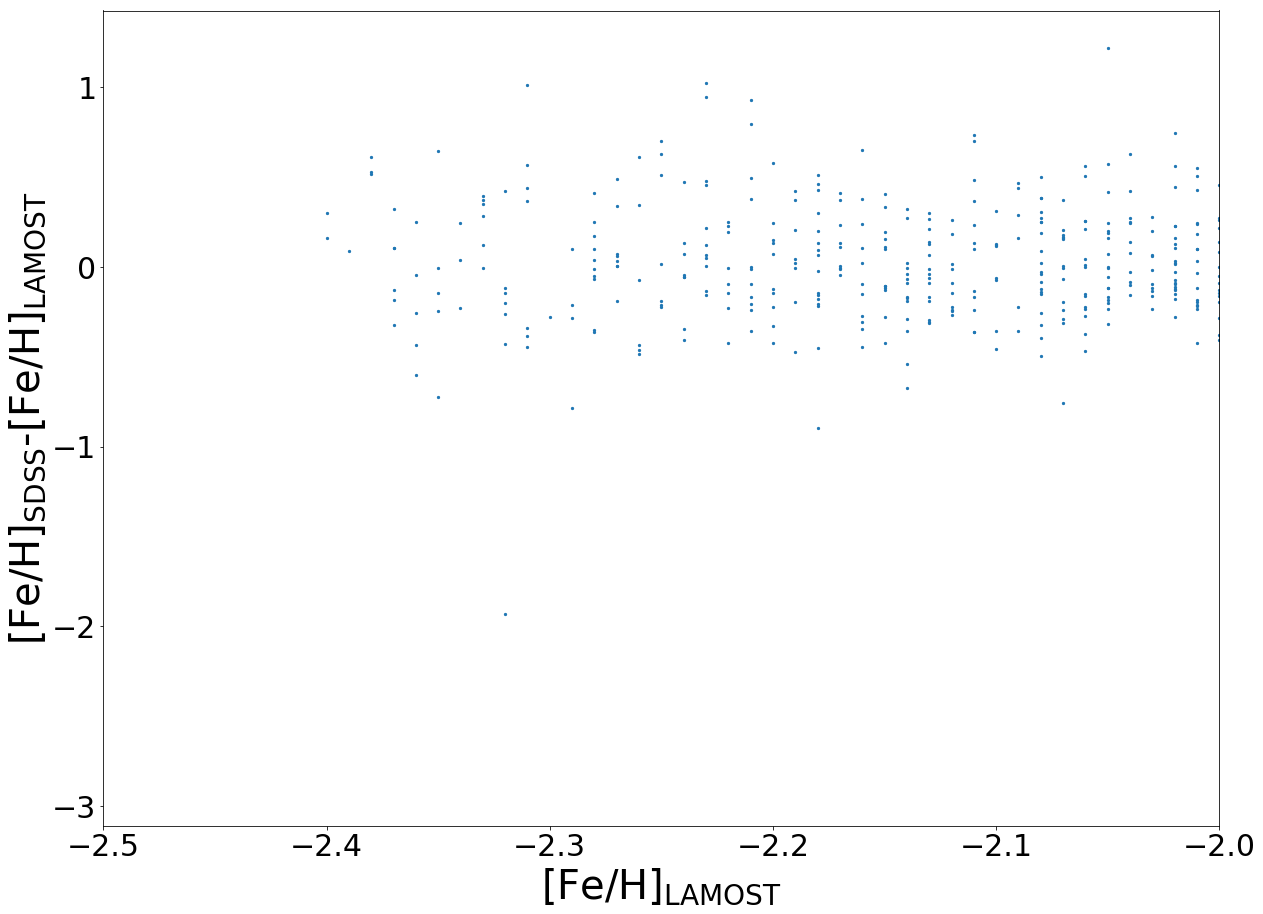

In [17]:
#x axis: [Fe/H]_spec
#y axis: delta [Fe/H]: my values - spectroscopic value: straight line
#the shape tells us about how our my method is doing

delta = feh_sdss-feh_lamost

fig, ax = plt.subplots(figsize=(20,15))

ax.scatter(feh_lamost,delta,s=5)
plt.xlabel('[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
plt.ylabel('[Fe/H]$_\mathregular{SDSS}$-[Fe/H]$_\mathregular{LAMOST}$',fontsize=40)
        
ax.set_xlim(-2.5,-2)

ax.tick_params(axis='both', which='major', labelsize=30)
